In [189]:
# load plotting library and src files
using PyPlot
include("./src/calcpml_2d.jl");
include("./src/yeeder.jl");
include("./src/fdfd.jl");

In [269]:
n = 2000;
BC = [-2,-2];
Nx2 = n;
Ny2 = n;
Nx = div(Nx2,2);     Ny = div(Ny2,2);
ER2  = ones(Complex64,Nx2,Ny2);
e = 14
ER2[700:1300,700:1300] = e;
MUR2 = ones(Complex64,Nx2,Ny2);
RES  = [1e-9,1e-9];
NPML = [40 40 40 40]
lambda0 = 1500e-9;
Pol = "Hz";
theta = 0;
Q = zeros(Complex64,Nx,Ny);
Q[500,500] = im;
Q[500,300] = 1;
Q[500,700] = -1;

(Ex,Ey,Ez,Hx,Hy,Hz) = fdfd(ER2,MUR2,RES,NPML,BC,lambda0,Pol,Q;verbose=false,TFSF=false,theta=theta);

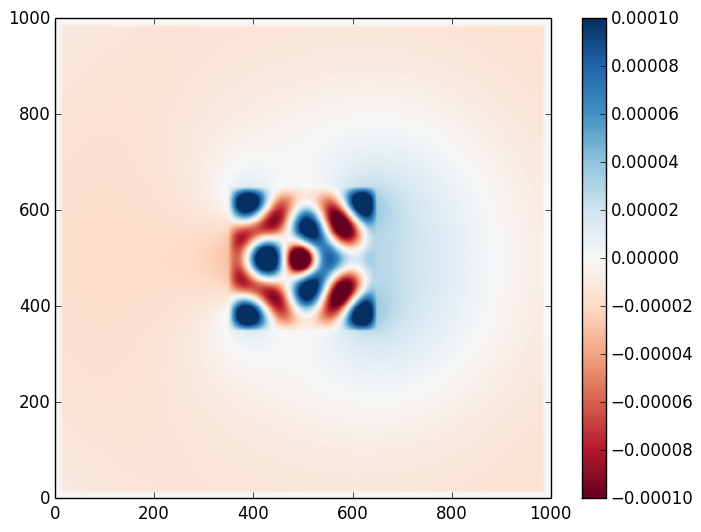

PyObject <matplotlib.colorbar.Colorbar instance at 0x368de3128>

In [277]:
pcolormesh(imag(Hz),cmap="RdBu",vmin=-0.0001,vmax=0.0001)
colorbar()